In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [277]:
data = pd.read_csv("energydata.csv")

In [346]:
data

,Project ID,Account Type,Project Status,Gate Approved (Picklist),Type,Zip 5,Site Visit Date,I - IR Approval Date (P),Duration,Current IOU kWh,Current IOU Therms,DAC,GHG Saved
0,A102SWB3,School District,Withdrawn,Gate 3,Whole Building,91803,2/25/2015,10/1/2016,584,0.0,0,0,0.000
1,A102SWB2,School District,Withdrawn,Gate 3,Whole Building,91803,2/25/2015,10/1/2016,584,0.0,0,0,0.000
2,A47WDPO1,Water/Wastewater District,Withdrawn,Gate 2,Process Optimization,91730,1/30/2016,9/5/2017,584,0.0,0,1,0.000
3,A38CLT13,City,Withdrawn,Gate 4,Lighting,92701,9/1/2017,4/8/2019,584,81099.0,0,1,41928.183
4,A38CLT8,City,Withdrawn,Gate 4,Lighting,92701,4/30/2017,12/5/2018,584,332865.0,0,1,172091.205
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,A133SWB2-P2Z,School District,On-Hold,Gate 2,Mechanical,92335,9/4/2019,5/31/2022,1000,241324.0,0,1,124764.508
1310,A133SWB1-P2Z,School District,On-Hold,Gate 2,Lighting,92335,9/4/2019,3/31/2022,939,97496.0,0,1,50405.432
1311,A133SWB3,School District,Withdrawn,Gate 2,Mechanical,92335,9/4/2019,6/30/2021,665,522171.0,5128,1,331036.887
1312,A133SWB1,School District,Withdrawn,Gate 2,Lighting,92335,9/4/2019,5/30/2021,634,129692.0,13181,1,224036.474


In [278]:
data['Duration']=data[['Duration']].apply(pd.to_numeric)

In [345]:
data['GHG Saved'] = 517 * (data['Current IOU kWh']/1000) + 11.91 * data['Current IOU Therms']

## Duration across project types

Text(0, 0.5, 'Project Type')

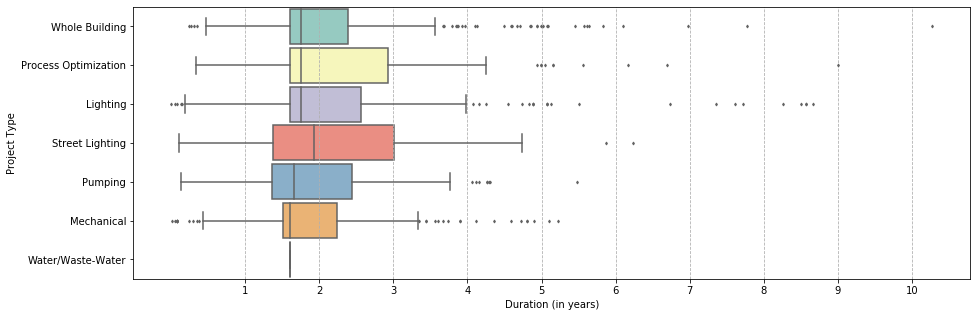

In [282]:
plt.figure(figsize=(15, 5))
plt.grid(linestyle = '--')
plt.xticks(ticks=[365,730,1095,1460,1825,2190,2555,2920, 3285, 3650],
           labels=[1,2,3,4,5,6,7,8,9,10])
ax = sns.boxplot(y="Type", x="Duration", data=data, fliersize=2,palette="Set3", width=.9)
plt.xlabel("Duration (in years)")
plt.ylabel("Project Type")

## Duration across account types

Text(0, 0.5, 'Agency Type')

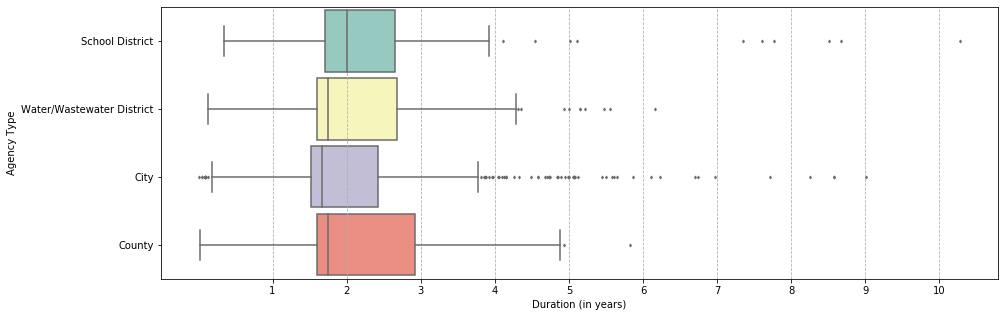

In [280]:
plt.figure(figsize=(15, 5))
plt.grid(linestyle = '--')
plt.xticks(ticks=[365,730,1095,1460,1825,2190,2555,2920, 3285, 3650],
           labels=[1,2,3,4,5,6,7,8,9,10])
ax = sns.boxplot(y="Account Type", x="Duration", data=data, fliersize=2,palette="Set3", width=.9)
plt.xlabel("Duration (in years)")
plt.ylabel("Agency Type")

## Duration between DAC status

Text(0.5, 0, 'DAC')

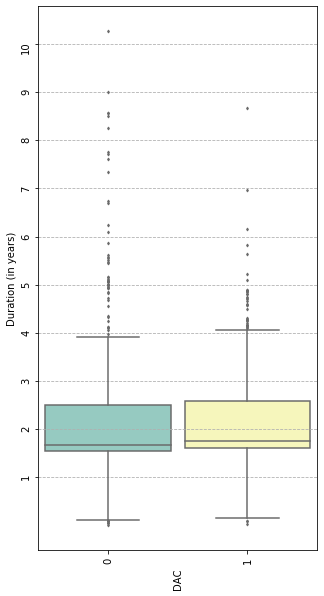

In [302]:
plt.figure(figsize=(5, 10))
plt.grid(linestyle = '--')
plt.yticks(ticks=[365,730,1095,1460,1825,2190,2555,2920, 3285, 3650],
           labels=[1,2,3,4,5,6,7,8,9,10], rotation='vertical')
plt.xticks(rotation='vertical')
ax = sns.boxplot(x="DAC", y="Duration", data=data, fliersize=2,palette="Set3", width=.9)
plt.ylabel("Duration (in years)")
plt.xlabel('DAC',rotation=90)

## Savings across project types

Text(0, 0.5, 'Project Type')

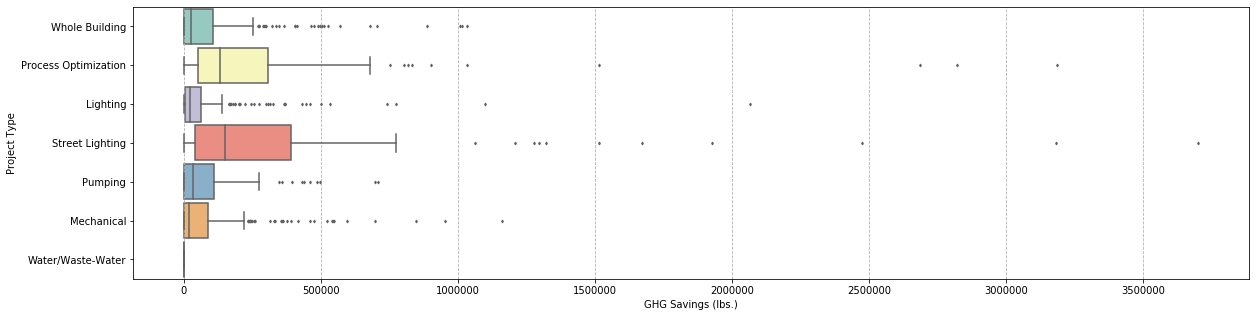

In [350]:
plt.figure(figsize=(20, 5))
plt.grid(linestyle = '--')
#plt.xticks(ticks=[365,730,1095,1460,1825,2190,2555,2920, 3285, 3650],
#           labels=[1,2,3,4,5,6,7,8,9,10])
ax = sns.boxplot(y="Type", x="GHG Saved", data=data, fliersize=2,palette="Set3", width=.9)
plt.xlabel("GHG Savings (lbs.)")
plt.ylabel("Project Type")
#plt.xlim(-100000,1000000)

Text(0, 0.5, 'Project Type')

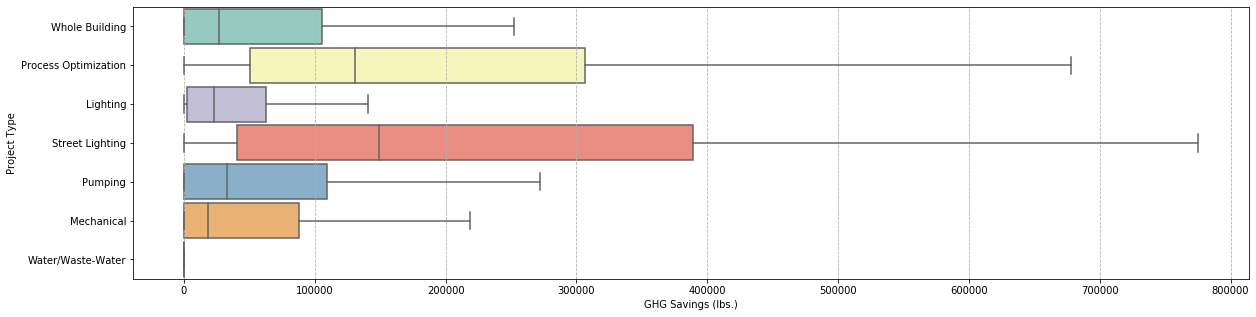

In [351]:
plt.figure(figsize=(20, 5))
plt.grid(linestyle = '--')
#plt.xticks(ticks=[365,730,1095,1460,1825,2190,2555,2920, 3285, 3650],
#           labels=[1,2,3,4,5,6,7,8,9,10])
ax = sns.boxplot(y="Type", x="GHG Saved", data=data, showfliers=False,palette="Set3", width=.9)
plt.xlabel("GHG Savings (lbs.)")
plt.ylabel("Project Type")
#plt.xlim(-100000,1000000)

## Savings across account types

Text(0.5, 0, 'GHG Savings (lbs.)')

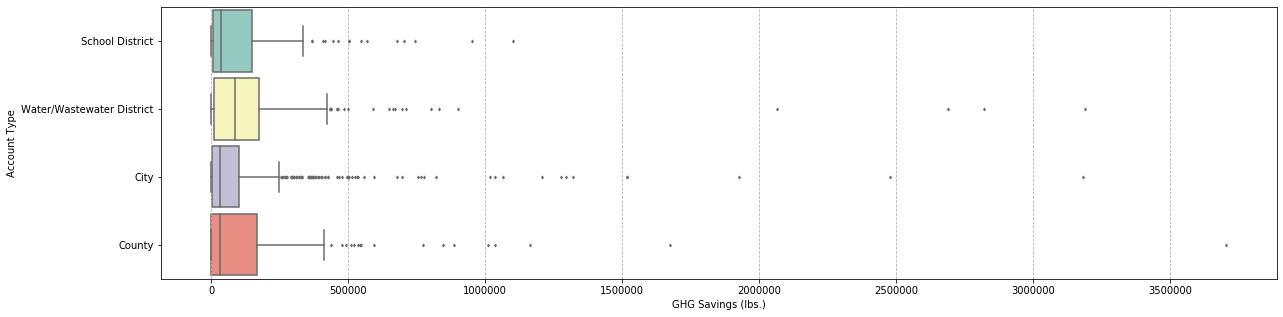

In [352]:
plt.figure(figsize=(20, 5))
plt.grid(linestyle = '--')
#plt.xticks(ticks=[365,730,1095,1460,1825,2190,2555,2920, 3285, 3650],
#           labels=[1,2,3,4,5,6,7,8,9,10])
ax = sns.boxplot(y="Account Type", x="GHG Saved", data=data, fliersize=2,palette="Set3", width=.9)
plt.xlabel("GHG Savings (lbs.)")
#plt.ylabel("Account Type")
#plt.xlim(-100000,1000000)

Text(0.5, 0, 'GHG Savings (lbs.)')

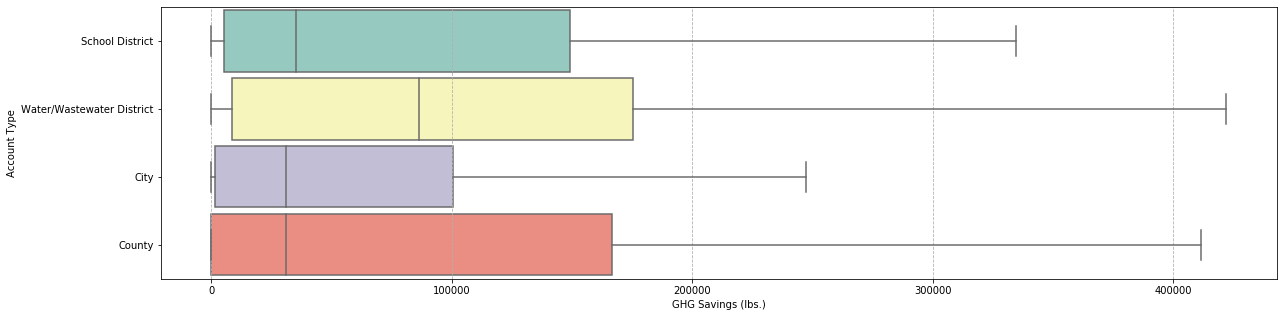

In [353]:
plt.figure(figsize=(20, 5))
plt.grid(linestyle = '--')
#plt.xticks(ticks=[365,730,1095,1460,1825,2190,2555,2920, 3285, 3650],
#           labels=[1,2,3,4,5,6,7,8,9,10])
ax = sns.boxplot(y="Account Type", x="GHG Saved", data=data, showfliers=False,palette="Set3", width=.9)
plt.xlabel("GHG Savings (lbs.)")
#plt.ylabel("Project Type")
#plt.xlim(-100000,1000000)

## Savings between DAC status

(array([0, 1]), <a list of 2 Text xticklabel objects>)

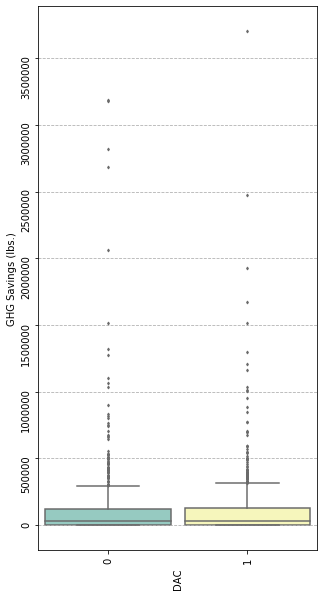

In [349]:
plt.figure(figsize=(5, 10))
plt.grid(linestyle = '--')
#plt.xticks(ticks=[365,730,1095,1460,1825,2190,2555,2920, 3285, 3650],
#           labels=[1,2,3,4,5,6,7,8,9,10])
ax = sns.boxplot(x="DAC", y="GHG Saved", data=data, fliersize=2,palette="Set3", width=.9)
plt.ylabel("GHG Savings (lbs.)")
plt.xlabel('DAC',rotation=90)
plt.yticks(rotation='vertical')
plt.xticks(rotation='vertical')
#plt.ylabel("Account Type")
#plt.xlim(-100000,1000000)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

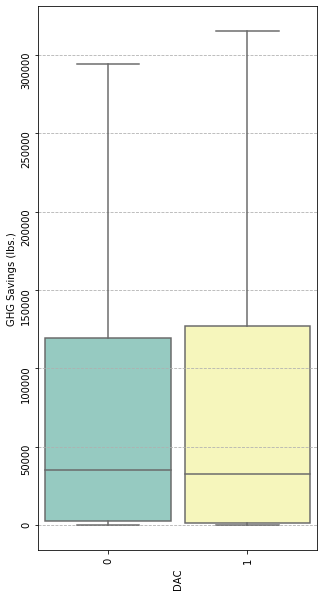

In [348]:
plt.figure(figsize=(5, 10))
plt.grid(linestyle = '--')
#plt.xticks(ticks=[365,730,1095,1460,1825,2190,2555,2920, 3285, 3650],
#           labels=[1,2,3,4,5,6,7,8,9,10])
ax = sns.boxplot(x="DAC", y="GHG Saved", data=data, showfliers=False,palette="Set3", width=.9)
plt.ylabel("GHG Savings (lbs.)")
plt.xlabel('DAC',rotation=90)
plt.yticks(rotation='vertical')
plt.xticks(rotation='vertical')
#plt.ylabel("Account Type")
#plt.xlim(-100000,1000000)